In [2]:
from tensorflow import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

一个深度学习模型的实例

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape(60000, 784).astype("float32") / 255.0

In [5]:
X_test = X_test.reshape(10000, 784).astype("float32") / 255.0

In [6]:
Y_train = np_utils.to_categorical(Y_train)

In [8]:
Y_test = np_utils.to_categorical(Y_test)

In [10]:
model = Sequential()

2021-07-20 22:04:03.676477: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.add(Dense(units = 64, input_dim = 28 * 28, activation = "relu"))

In [12]:
model.add(Dense(units = 10, activation = "softmax"))

In [13]:
model.compile(loss="categorical_crossentropy", optimizer = "sgd", metrics=["accuracy"])

In [21]:
model.fit(X_train, Y_train, epochs=5, batch_size = 32)

Epoch 1/5
1875/1875 [==============================] - 1s 693us/step - loss: 0.2279 - accuracy: 0.9355
Epoch 2/5
1875/1875 [==============================] - 1s 671us/step - loss: 0.2133 - accuracy: 0.9399
Epoch 3/5
1875/1875 [==============================] - 1s 674us/step - loss: 0.2001 - accuracy: 0.9437
Epoch 4/5
1875/1875 [==============================] - 1s 684us/step - loss: 0.1890 - accuracy: 0.9470
Epoch 5/5
1875/1875 [==============================] - 1s 684us/step - loss: 0.1791 - accuracy: 0.9497


In [22]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

313/313 [==============================] - 0s 641us/step - loss: 0.1776 - accuracy: 0.9478


In [23]:
print("loss_and_metrics: " + str(loss_and_metrics))

loss_and_metrics: [0.17764976620674133, 0.9477999806404114]


将深度模型可视化

In [28]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

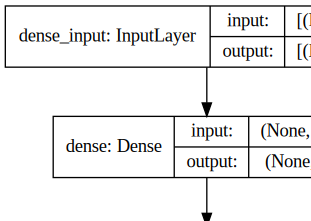

In [29]:
%matplotlib inline
SVG(model_to_dot(model, show_shapes=True).create(prog="dot", format="svg"))

储存模型

In [30]:
from keras.models import load_model

In [31]:
model.save("mnist_mlo_model.h5")

In [33]:
model = load_model("mnist_mlo_model.h5")